In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from folium import plugins
from folium.plugins import HeatMapWithTime
import folium
import geopandas as gpd
from folium.plugins import HeatMap
%matplotlib inline

/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('ebird_data/ebirddata.csv')


In [3]:
df.head()

,Unnamed: 0,STATE,LONGITUDE,LATITUDE,OBSERVATION.COUNT,OBSERVATION.DATE
0,1,Maryland,-76.049252,39.547140,7,2010-06-12
1,2,Pennsylvania,-75.506544,40.369880,3,2010-07-11
2,3,Connecticut,-73.198686,41.733277,8,2010-05-21
3,4,New Jersey,-74.941208,38.946240,1,2010-04-29
4,5,New York,-73.968953,40.660284,X,2010-11-10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287450 entries, 0 to 287449
Data columns (total 6 columns):
Unnamed: 0           287450 non-null int64
STATE                287450 non-null object
LONGITUDE            287450 non-null float64
LATITUDE             287450 non-null float64
OBSERVATION.COUNT    287450 non-null object
OBSERVATION.DATE     287450 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 13.2+ MB


In [7]:
month=[]
day=[]
year=[]
df['OBSERVATION.DATE'] =  pd.to_datetime(df['OBSERVATION.DATE'])
month = df['OBSERVATION.DATE'].dt.month
day= df['OBSERVATION.DATE'].dt.day
year= df['OBSERVATION.DATE'].dt.year  

df['Day']=pd.Series(day)
df['Month']=pd.Series(month)
df['Year']=pd.Series(year)

In [8]:
df['OBSERVATION.COUNT']=df['OBSERVATION.COUNT'].astype(int)

In [149]:
df_conn=df[df['STATE']=='Connecticut']

In [9]:
df_mich=df[df['STATE']=='Michigan']

In [131]:
df_rhode=df[df['STATE']=='Rhode Island']

In [145]:
df_mass=df[df['STATE']=='Massachusetts']

In [282]:
df_ny=df[df['STATE']=='New York']

In [10]:
df_mich=df_mich[df_mich['Year']==2019]


In [133]:
df_rhode=df_rhode[df_rhode['Year']==2019]


In [146]:
df_mass=df_mass[df_mass['Year']==2019]


In [ ]:
df_mich=df_mich[df_mich['Year']==2019]


In [138]:
df_conn=df_conn[df_conn['Year']==2017]

In [283]:
df_ny=df_ny[df_ny['Year']==2019]

In [272]:
df_ny['OBSERVATION.COUNT'].max()

242

In [260]:
print(df_ny['OBSERVATION.COUNT'].max(),df_mich['OBSERVATION.COUNT'].max(),df_conn['OBSERVATION.COUNT'].max())

NameError: name 'df_conn' is not defined

In [103]:
conn_county = gpd.GeoDataFrame.from_file('Connecticut_Counties/tl_2019_09_cousub.shp')

In [11]:
mich_county=gpd.GeoDataFrame.from_file('Michigan_Counties/Counties_v17a.shp')

In [147]:
mass_county=gpd.GeoDataFrame.from_file('Massachusetts_Counties/Massachusetts_Counties.shp')

In [314]:
ny_county=gpd.GeoDataFrame.from_file('ny_Counties/State.shp')

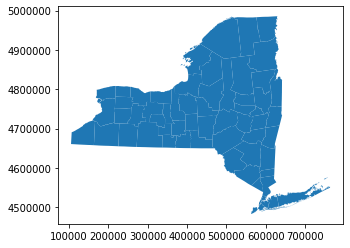

In [263]:
shoreline=gpd.GeoDataFrame.from_file('ny_Counties/Counties_shoreline.shp')
shoreline.plot()

In [149]:
df_mass_summer=df_mass[df_mass['Month']>2]
df_mass_summer=df_mass_summer[df_mass_summer['Month']<10]

In [256]:
#massachusetts
mass_map=folium.Map(location=[42.4072,-71.3824],zoom_start=8)
folium.GeoJson(mass_county,name='geojson').add_to(mass_map)

HeatMap(data=df_mass[['LATITUDE', 'LONGITUDE', 'OBSERVATION.COUNT']], radius=8, gradient={.5:'green',.4:'lime'},max_val=168,max_zoom=6,blur=10).add_to(mass_map)

mass_map.save('mass_heatmap_muteswan_green.html')

In [284]:
df_ny_summer=df_ny[df_ny['Month']<10]

In [285]:
df_ny_summer=df_ny_summer[df_ny_summer['Month']>3]

In [286]:
df_ny_summer.head()

,Unnamed: 0,STATE,LONGITUDE,LATITUDE,OBSERVATION.COUNT,OBSERVATION.DATE,Day,Month,Year
238096,238097,New York,-72.369990,40.990913,3,2019-07-24,24,7,2019
238114,238115,New York,-73.968953,40.660284,6,2019-04-15,15,4,2019
238115,238116,New York,-77.707329,43.310752,4,2019-08-30,30,8,2019
238116,238117,New York,-73.145170,40.932741,2,2019-06-12,12,6,2019
238128,238129,New York,-73.371334,40.890336,5,2019-05-21,21,5,2019


In [231]:
### michigan summer
mich_map=folium.Map(location=[44.3148,-85.6024],zoom_start=6)
#folium.GeoJson(mich_county,name='geojson').add_to(mich_map)
HeatMap(data=df_mich_summer_m5[['LATITUDE', 'LONGITUDE', 'OBSERVATION.COUNT']], radius=14, gradient ={.5:'green',.4: 'lime'},max_val=15,max_zoom=1,blur=16).add_to(mich_map)

mich_map.save('mich_muteswan_summer_heatmap_m6.html')

In [129]:
#michigan
mich_map=folium.Map(location=[44.3148,-85.6024],zoom_start=7)
folium.GeoJson(mich_county,name='geojson').add_to(mich_map)
HeatMap(data=df_mich[['LATITUDE', 'LONGITUDE', 'OBSERVATION.COUNT']], radius=12, max_val=1500,max_zoom=6,blur=5).add_to(mich_map)

mich_map.save('mich_muteswan_heatmap.html')

In [159]:
### michigan summer
mich_map=folium.Map(location=[44.3148,-85.6024],zoom_start=6)
#folium.GeoJson(mich_county,name='geojson').add_to(mich_map)
HeatMap(data=df_mich_summer_m5[['LATITUDE', 'LONGITUDE', 'OBSERVATION.COUNT']], radius=25, max_val=1000,max_zoom=6,blur=5).add_to(mich_map)

mich_map.save('mich_muteswan_summer_heatmap_m5.html')

In [222]:
conn_map=folium.Map(location=[41.6032,-73.0877],zoom_start=8)
folium.GeoJson(conn_county,name='geojson').add_to(conn_map)

HeatMap(data=df_conn[['LATITUDE', 'LONGITUDE', 'OBSERVATION.COUNT']], radius=15, max_val=400,max_zoom=6,blur=18).add_to(conn_map)
conn_map.save('conn_heatmap.html')

NameError: name 'conn_county' is not defined

In [136]:
rhode_map=folium.Map(location=[41.6032,-73.0877],zoom_start=8)
#folium.GeoJson(conn_county,name='geojson').add_to(conn_map)

HeatMap(data=df_rhode[['LATITUDE', 'LONGITUDE', 'OBSERVATION.COUNT']], radius=15, max_val=200,max_zoom=6,blur=15).add_to(rhode_map)
rhode_map.save('rhode_heatmap.html')

In [315]:
ny_map=folium.Map(location=[40.7128,-74.0060],zoom_start=7)
folium.GeoJson(ny_county,name='geojson').add_to(ny_map)

HeatMap(data=df_ny[['LATITUDE', 'LONGITUDE', 'OBSERVATION.COUNT']], radius=10,gradient ={.5:'green',.3: 'lime'}, max_val=500,max_zoom=6,blur=10).add_to(ny_map)
ny_map.save('ny_muteswan_heatmap2.html')

In [316]:
ny_map=folium.Map(location=[40.7128,-74.0060],zoom_start=7)
folium.GeoJson(ny_county,name='geojson').add_to(ny_map)

HeatMap(data=df_ny_summer[['LATITUDE', 'LONGITUDE', 'OBSERVATION.COUNT']], radius=10,gradient ={.6:'green',.2: 'lime'}, max_val=500,max_zoom=6,blur=10).add_to(ny_map)
ny_map.save('ny_heatmap.html')